# Análisis de Data

### Hipótesis 1: Existe estacionalidad en el mes de Junio y Noviembre 
### Hipótesis 2: El producto tiene una tendencia de crecimiento en los últimos años
### Hipótesis 3: El comportamiento de la variable de Inversión e Historicos son similares
### Hipótesis 4: Existe una correlación entre Inversión e Historicos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from scipy.optimize import minimize
from statsmodels.graphics.tsaplots import plot_acf

In [2]:
%config InlineBackend.figure_format = "retina"
plt.rcParams["figure.figsize"] = (10, 4)
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False

## Análisis general de la base de datos

Los datos se presentan de forma mensual a partir del 2018 a Junio del 2020. La variable "Historico" se encuentra expresado en toneladas e "Inversión" en millones de pesos

In [3]:
data = pd.read_csv("Base.csv", encoding = "latin-1", index_col = 0) 
data.head(10)

,Historico,Inversion
Fecha,,
01/01/2018,5006,1721.35
02/01/2018,3979,1793.28
03/01/2018,4138,2312.67
04/01/2018,6647,2783.06
05/01/2018,6609,2744.71
06/01/2018,7327,2693.81
07/01/2018,4964,2470.53
08/01/2018,6649,6490.23
09/01/2018,5936,285.99


In [4]:
data.shape

(30, 2)

In [5]:
data.index.dtype

dtype('O')

In [6]:
data.index = pd.to_datetime(data.index)
data.index.dtype

dtype('<M8[ns]')

In [7]:
data.dtypes

Historico      int64
Inversion    float64
dtype: object

In [8]:
hst = data["Historico"].resample("M").sum()
inv = data["Inversion"].resample("M").sum()

Text(0, 0.5, 'Frecuencia')

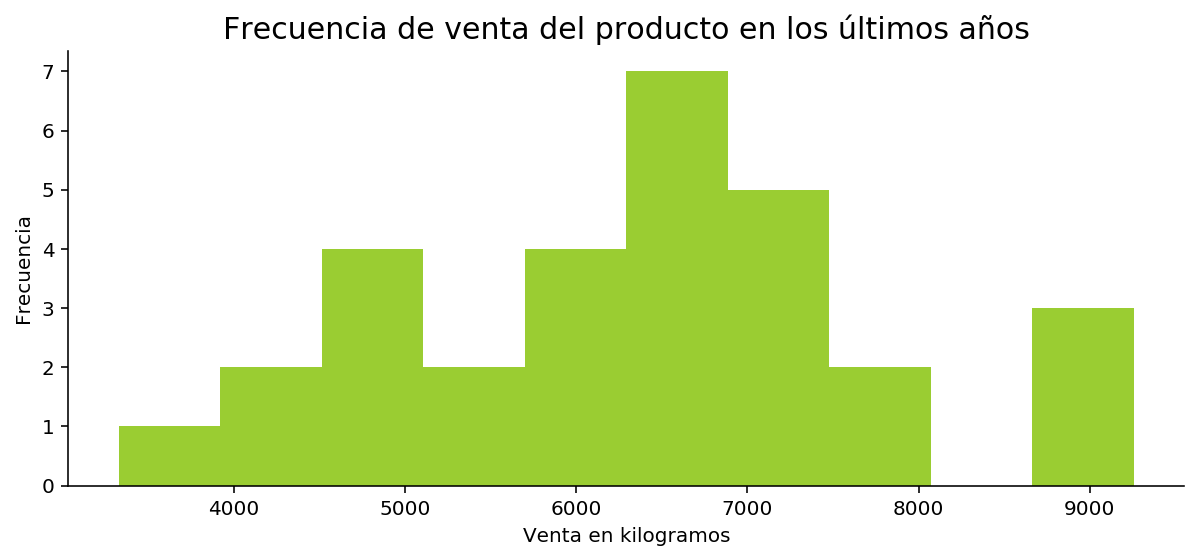

In [49]:
plt.hist(hst, color="yellowgreen")
plt.title("Frecuencia de venta del producto en los últimos años",fontsize=15)
plt.xlabel("Venta en kilogramos")
plt.ylabel("Frecuencia")

Se puede apreciar que el promedio de venta de los últimos dos años se encuentra entre 6,000 - 7,000 toneladas; sin embargo hubo 5 meses atípicos dentro del comportamiento del producto

In [10]:
data.describe()

,Historico,Inversion
count,30.000000,30.000000
mean,6332.666667,2412.512000
std,1406.012541,1082.570132
min,3329.000000,285.990000
25%,5197.750000,1816.847500
50%,6544.000000,2452.870000
75%,7090.750000,2735.830000
max,9255.000000,6490.230000


Se comprueba que el promedio de venta es de 6,333 toneladas

In [11]:
data["Historico"].idxmin() 

Timestamp('2019-04-01 00:00:00')

La venta mínima del producto ocurrío en abril del 2019; esto se debe a un cambio de presentación del producto

In [12]:
data["Historico"].idxmax()

Timestamp('2019-11-01 00:00:00')

La venta máxima del producto ocurrío en noviembre del 2019; esto se debe la alta demanda que presentó el producto en ese año.  

### Gráfica Boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x22d8d5f1ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x22d8d5f5c48>,
 'boxes': [<matplotlib.lines.Line2D at 0x22d8d5f1908>],
 'medians': [<matplotlib.lines.Line2D at 0x22d8d5fbd48>],
 'fliers': [<matplotlib.lines.Line2D at 0x22d8d5fed08>],
 'means': []}

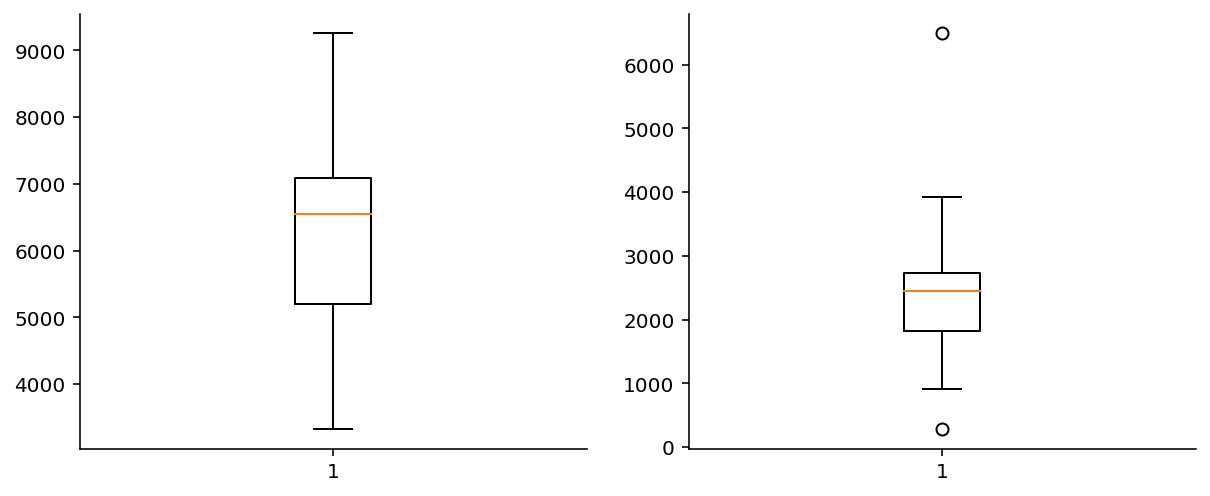

In [30]:
fig, ax = plt.subplots(1, 2)
ax[0].boxplot(hst)
ax[1].boxplot(inv) 

Al analizar el primer gráfico se observa que no existen outliers dentro de la información de "Histórico", contrario al segundo donde existen dos meses con outliers dentro de la data.

## Comportamiento: Tendencia & Estacionalidad

Para visualizar el comportamiento del producto será necesario gráficar los historicos de venta que se han tenido a lo largo de los años 2018 a Junio 2020

Text(0.5, 1.0, 'Comportamiento de la venta del producto del 2018 - Junio 2020')

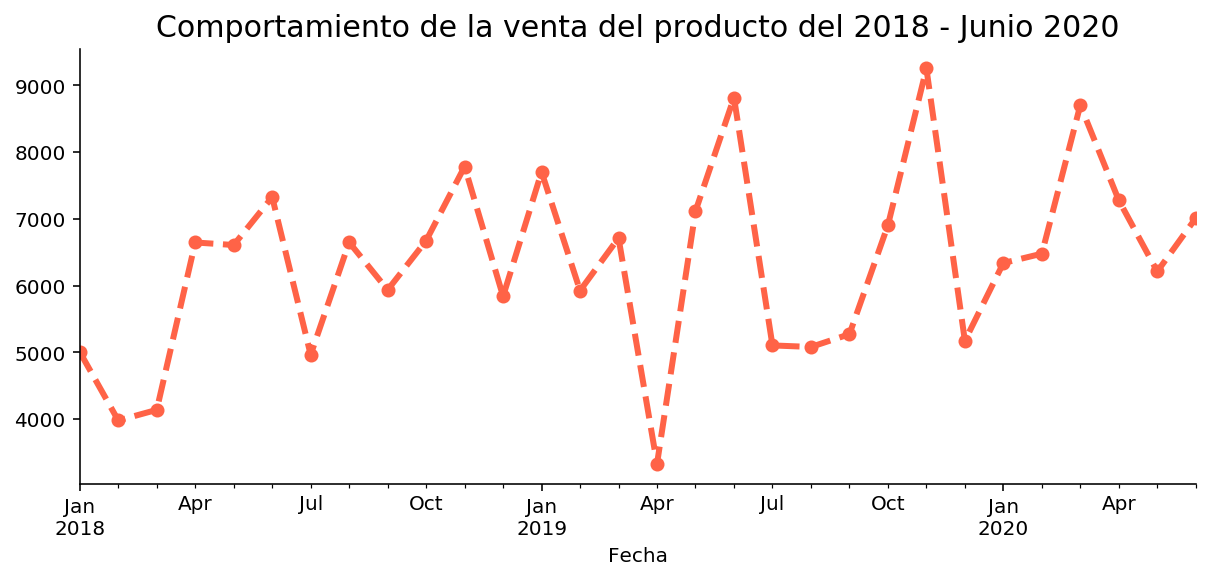

In [50]:
hst.plot(marker="o",color="tomato", linewidth=3, linestyle="--")
plt.title("Comportamiento de la venta del producto del 2018 - Junio 2020",fontsize=15)

Text(0.5, 1.0, 'Comportamiento de venta en el 2019')

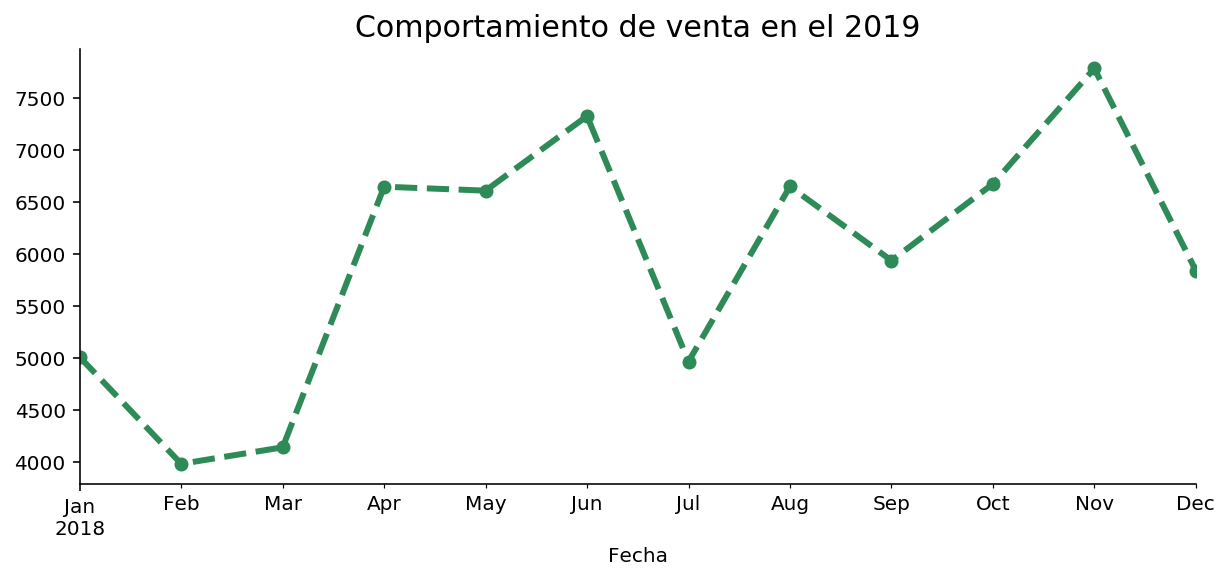

In [38]:
hst["2018"].plot(marker="o",color="seagreen", linewidth=3, linestyle="--")
plt.title("Comportamiento de venta en el 2019",fontsize=15)

Text(0.5, 1.0, 'Comportamiento de venta en el 2019')

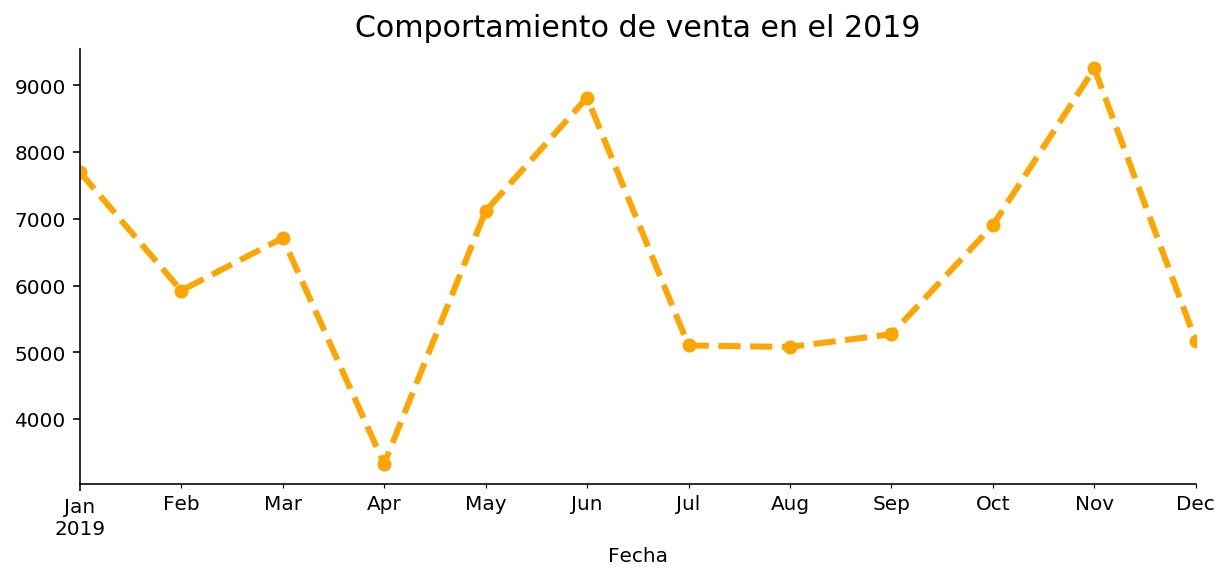

In [41]:
hst["2019"].plot(marker="o",color="orange", linewidth=3, linestyle="--")
plt.title("Comportamiento de venta en el 2019",fontsize=15)

Se aprecia que existe una alta compra del producto en los meses de Junio/Noviembre en el 2018, de hecho, son los picos de ventas más grandes dentro del año, el cual, se repite para el 2019; por lo tanto podemos asumir que existe cierta estacionalidad en esos meses.

In [16]:
venta2018= hst["2018"].sum() #Calculo total de toneladas vendidas para el 2018
venta2018

71554

In [17]:
venta2019 = hst["2019"].sum() #Calculo total de toneladas vendidas para el 2019
venta2019

76399

In [18]:
Crec18= ((venta2019/venta2018)-1)*100 
Crec18

6.771109930961239

Se visualiza que hubo un crecimiento del 6.77% entre los años 2018 y 2019. 
Al no tener los datos completos del año en curso, 2020, se realizará el mismo ejercicio pero comparando el primer semestre de cada año (H1)

In [42]:
H2018= hst["2018-01-01":"2018-06-01"].sum() #Calculo total de toneladas vendidas para el primer semestre del 2018
H2018

26379

In [43]:
H2019= hst["2019-01-01":"2019-06-01"].sum() #Calculo total de toneladas vendidas para el primer semestre del 2019
H2019

30790

In [44]:
H2020= hst["2020-01-01":"2020-06-01"].sum() #Calculo total de toneladas vendidas para el primer semestre del 2020
H2020

35015

In [45]:
Crec19H= ((H2019/H2018)-1)*100
Crec19H

16.721634633610073

In [46]:
Crec20H= ((H2020/H2019)-1)*100
Crec20H

13.721987658330637

Se puede observar un crecimiento por arriba del 10% en cada año. Esto muestra una tendencia de crecimiento del producto estudiado al paso del tiempo.

Text(0.5, 1.0, 'Comportamiento de la inversión del producto del 2018- Junio 2020')

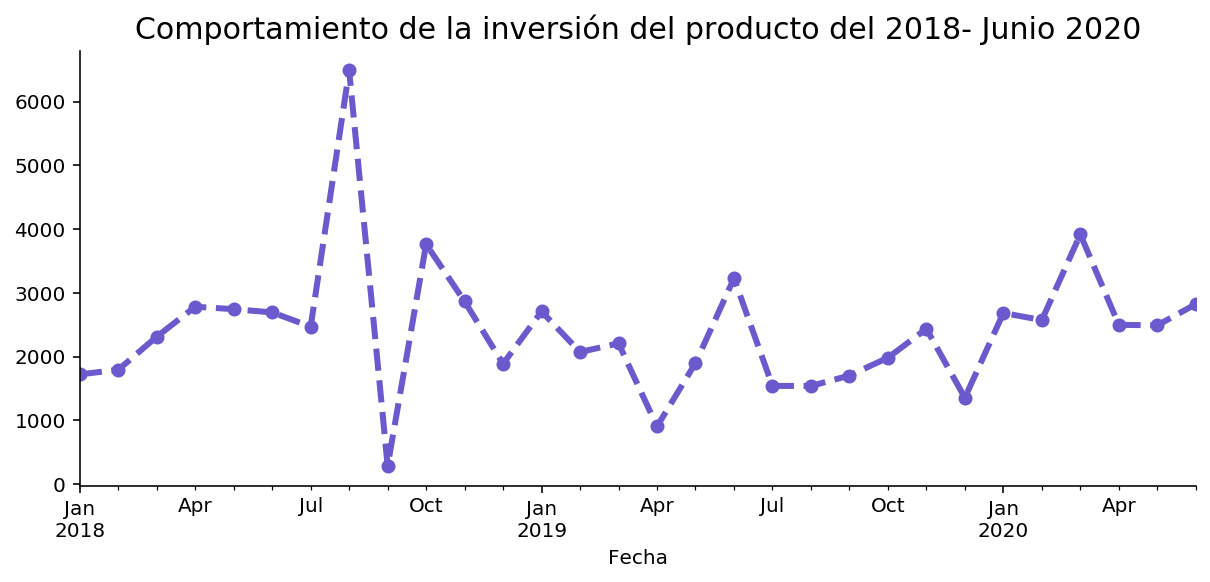

In [48]:
inv.plot(marker="o",color="slateblue", linewidth=3, linestyle="--")
plt.title("Comportamiento de la inversión del producto del 2018- Junio 2020",fontsize=15)

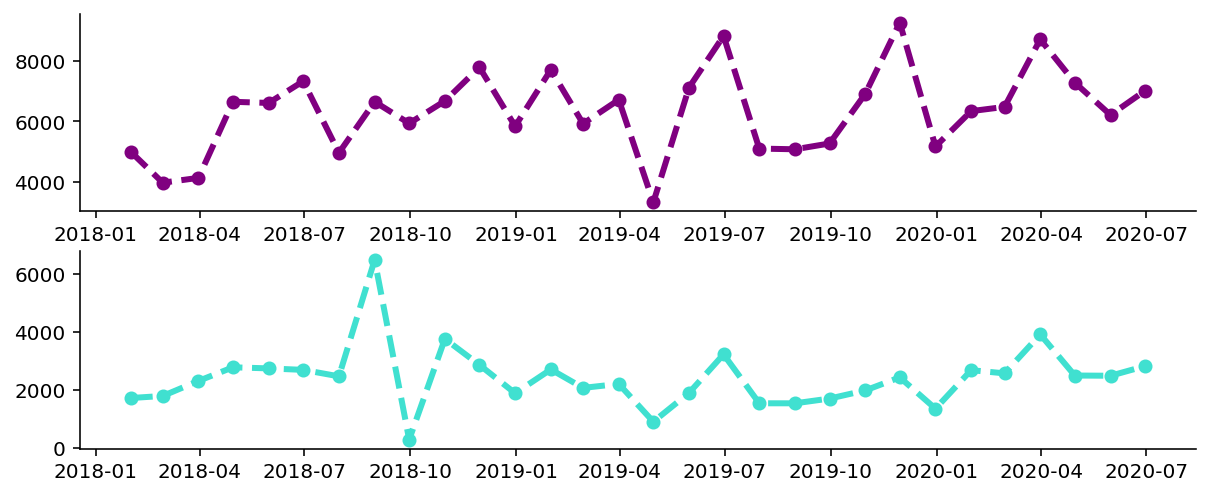

In [25]:
fig, ax = plt.subplots(2, 1)
ax[0].plot(hst, marker="o",color="purple", linewidth=3, linestyle="--")
ax[1].plot(inv, marker="o",color="turquoise", linewidth=3, linestyle="--") 

Al analizar el comportamiento de la variable "Inversión" versus la variable "Historico" se puede notar que podrían tener el mismo comportamiento. 

## Autocorrelación de Historicos

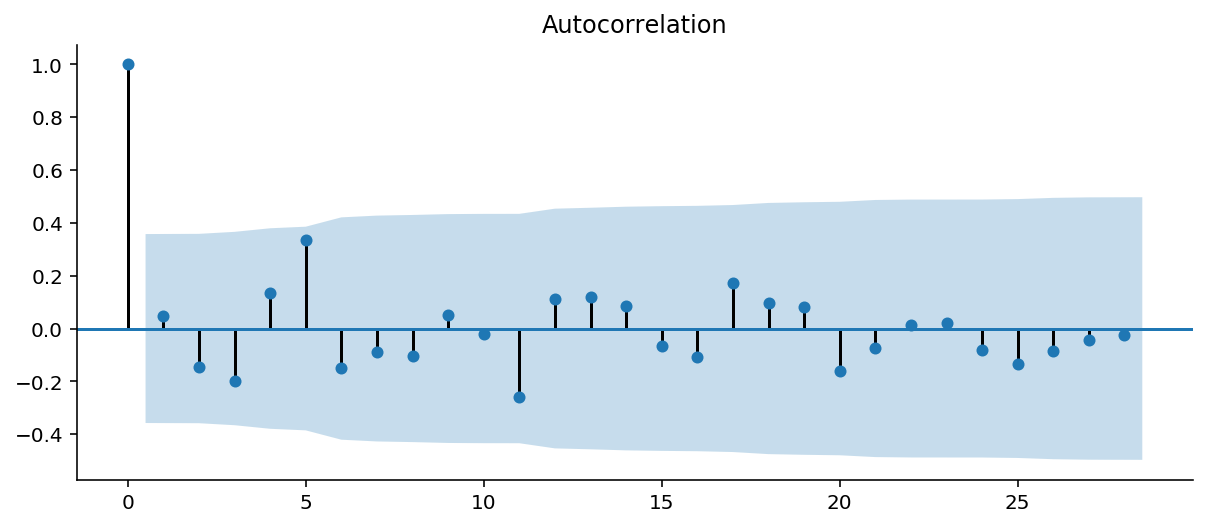

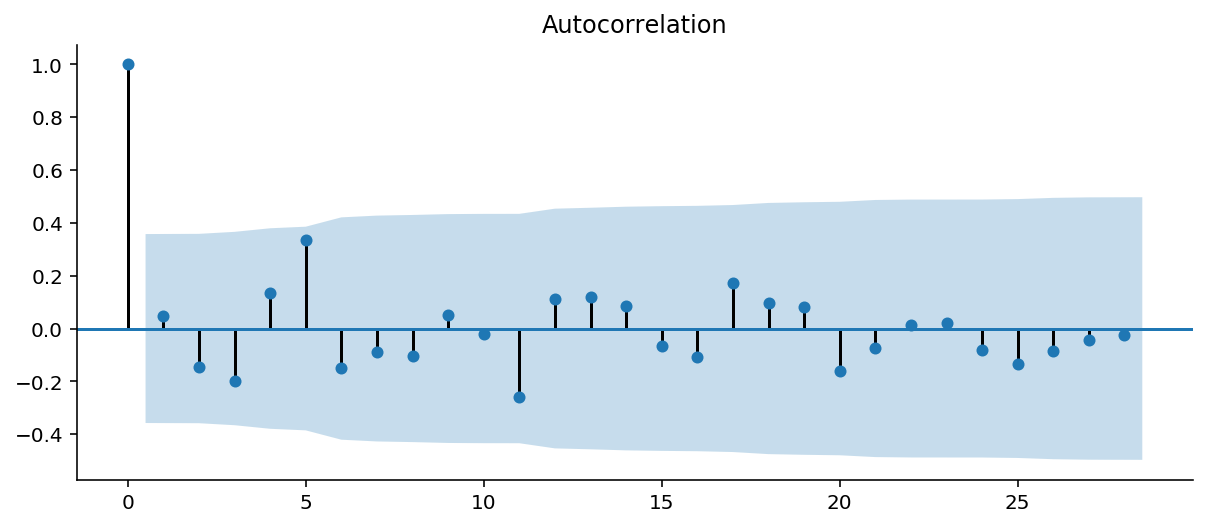

In [26]:
plot_acf(hst, lags=28)

No existe una correlación fuerte entre los datos históricos, es decir, no hay tanta relación de t con t-1

## Correlación

El método de Pearson ayudará a conocer si existe cierta relación entre la variable "Inversión" con "Historico"

In [27]:
data.corr(method="pearson")

,Historico,Inversion
Historico,1.000000,0.476895
Inversion,0.476895,1.000000


A pesar de que no existe una correlación alta (más cerca al valor de 1), si existe cierta relación entre estas dos variables a usar.

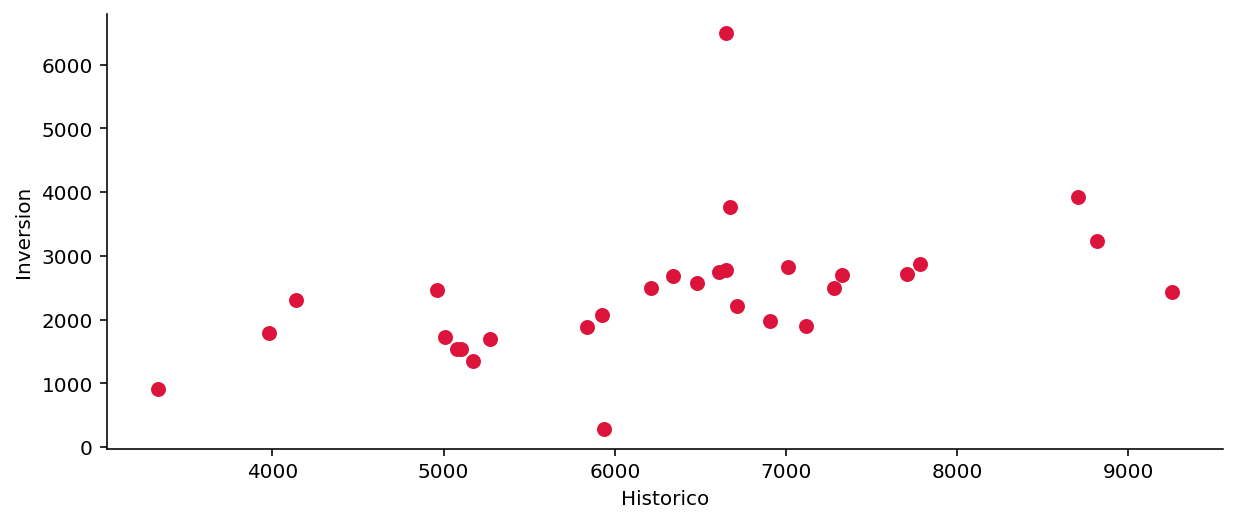

In [28]:
data.plot(kind="scatter",x="Historico",y="Inversion", color="crimson", linewidth=3)

Al gráficar las dos varibales se puede notar que existe una correlación lineal entre ellas.